In [0]:
import pandas as pd
from csv import reader
import os
import matplotlib.pyplot as plt

# File location and type
file_location = "/FileStore/tables/Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv"
file_type = "csv"

# read file into a spark dataframe
df = spark.read.format(file_type) \
  .option("inferSchema", "false") \
  .option("header", "true") \
  .option("sep", ",") \
  .load(file_location)

display(df.limit(10))

PdId,IncidntNum,Incident Code,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,location,SF Find Neighborhoods 2 2,Current Police Districts 2 2,Current Supervisor Districts 2 2,Analysis Neighborhoods 2 2,DELETE - Fire Prevention Districts 2 2,DELETE - Police Districts 2 2,DELETE - Supervisor Districts 2 2,DELETE - Zip Codes 2 2,DELETE - Neighborhoods 2 2,DELETE - 2017 Fix It Zones 2 2,Civic Center Harm Reduction Project Boundary 2 2,Fix It Zones as of 2017-11-06 2 2,DELETE - HSOC Zones 2 2,Fix It Zones as of 2018-02-07 2 2,"CBD, BID and GBD Boundaries as of 2017 2 2","Areas of Vulnerability, 2016 2 2",Central Market/Tenderloin Boundary 2 2,Central Market/Tenderloin Boundary Polygon - Updated 2 2,HSOC Zones as of 2018-06-05 2 2,OWED Public Spaces 2 2,Neighborhoods 2
3114751606302,031147516,06302,LARCENY/THEFT,PETTY THEFT FROM A BUILDING,Sunday,09/28/2003,10:00,SOUTHERN,NONE,1ST ST / BRANNAN ST,-120.5,90,POINT (-120.50000000000001 90),null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
5069701104134,050697011,04134,ASSAULT,BATTERY,Wednesday,06/22/2005,12:20,NORTHERN,NONE,1200 Block of EDDY ST,-122.428223303176,37.7818959488603,POINT (-122.42822330317601 37.7818959488603),97,4,11,39,7,9,11,29490,41,null,null,null,null,null,null,2,null,null,null,null,97
6074729204104,060747292,04104,ASSAULT,ASSAULT,Saturday,07/15/2006,00:55,CENTRAL,NONE,1600 Block of POWELL ST,-122.410672425337,37.799788690123,POINT (-122.41067242533701 37.799788690123),106,6,3,6,3,1,10,308,4,null,null,null,null,null,null,2,null,null,null,null,106
7103536315201,071035363,15201,ASSAULT,STALKING,Tuesday,09/25/2007,00:01,TARAVAL,NONE,400 Block of ULLOA ST,-122.458226300605,37.7413616001449,POINT (-122.458226300605 37.7413616001449),49,10,8,41,1,8,4,59,40,null,null,null,null,null,null,1,null,null,null,null,49
11082415274000,110824152,74000,MISSING PERSON,MISSING ADULT,Saturday,09/24/2011,11:00,TARAVAL,LOCATED,3200 Block of SAN JOSE AV,-122.459172646607,37.7082001648459,POINT (-122.459172646607 37.7082001648459),null,null,null,null,null,null,null,28588,null,null,null,null,null,null,null,null,null,null,null,null,null
4037801104134,040378011,04134,ASSAULT,BATTERY,Friday,12/12/2003,12:00,SOUTHERN,NONE,500 Block of I-80,-122.386667033903,37.7898821569191,POINT (-122.38666703390301 37.7898821569191),null,null,null,null,null,null,null,28856,null,null,null,null,null,null,null,null,null,null,null,null,null
4147669007025,041476690,07025,VEHICLE THEFT,STOLEN TRUCK,Thursday,12/30/2004,19:00,BAYVIEW,NONE,100 Block of KAREN CT,-122.407531316146,37.723291086507,POINT (-122.40753131614602 37.723291086507),91,2,2,25,10,3,7,309,28,null,null,null,null,null,null,1,null,null,null,null,91
16010127305073,160101273,05073,BURGLARY,"BURGLARY, UNLAWFUL ENTRY",Wednesday,02/03/2016,20:30,MISSION,"ARREST, BOOKED",2300 Block of 16TH ST,-122.40952991327822,37.76571843952822,POINT (-122.40952991327822 37.76571843952822),53,3,9,20,8,4,8,28853,19,null,null,null,3,null,null,2,null,null,3,null,53
17004924306243,170049243,06243,LARCENY/THEFT,PETTY THEFT FROM LOCKED AUTO,Wednesday,01/18/2017,18:20,TARAVAL,NONE,NORIEGA ST / SUNSET BL,-122.49522504431104,37.75341185338174,POINT (-122.49522504431104 37.75341185338174),39,10,7,35,1,8,3,56,35,null,null,null,null,null,null,1,null,null,null,null,39
16065828006244,160658280,06244,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/14/2016,21:00,TARAVAL,NONE,3200 Block of 20TH AV,-122.47564746078615,37.72852806274646,POINT (-122.47564746078615 37.72852806274647),41,10,8,16,1,8,4,64,14,null,null,null,null,null,null,2,null,null,null,null,41


In [0]:
# header
header = df.columns[:14]
header

Out[192]: ['PdId',
 'IncidntNum',
 'Incident Code',
 'Category',
 'Descript',
 'DayOfWeek',
 'Date',
 'Time',
 'PdDistrict',
 'Resolution',
 'Address',
 'X',
 'Y',
 'location']

In [0]:
# get data size
print("num rows:", df.count())

num rows: 2129525


In [0]:
# get all distinct Crime Category
crime_category = df.select("Category").distinct()
display(crime_category)
print("Number of distinct crime categories:", crime_category.count())

Category
FRAUD
SUICIDE
LIQUOR LAWS
SECONDARY CODES
MISSING PERSON
OTHER OFFENSES
DRIVING UNDER THE INFLUENCE
WARRANTS
ARSON
FORGERY/COUNTERFEITING


Number of distinct crime categories: 37


In [0]:
# get case count by category
display(df.groupby("Category").count().orderBy('count', ascending=False))

Category,count
LARCENY/THEFT,477975
OTHER OFFENSES,301874
NON-CRIMINAL,236928
ASSAULT,167042
VEHICLE THEFT,126228
DRUG/NARCOTIC,117821
VANDALISM,114718
WARRANTS,99821
BURGLARY,91067
SUSPICIOUS OCC,79087


In [0]:
# get case count by day of week
display(df.groupby("DayOfWeek").count().orderBy('count', ascending=False))

DayOfWeek,count
Friday,324151
Wednesday,311601
Saturday,308907
Thursday,303893
Tuesday,302455
Monday,294530
Sunday,283988


In [0]:
# get case count by hour
from pyspark.sql.functions import hour

count_by_hour = df.select(df.Time.cast('timestamp')) \
    .select(hour('Time').alias('hour')) \
    .groupby('hour') \
    .count()\
    .orderBy('hour')

display(count_by_hour)

hour,count
0,108935
1,63344
2,52910
3,34580
4,24530
5,21769
6,32422
7,52359
8,78337
9,85640


In [0]:
# get start date and end date
display(df.select(df.Date).summary("min", "max"))

summary,Date
min,01/01/2003
max,12/31/2017


In [0]:
# get case count by district
display(df.groupby("PdDistrict").count().orderBy('count', ascending=False))

PdDistrict,count
SOUTHERN,390692
MISSION,288985
NORTHERN,266435
CENTRAL,221923
BAYVIEW,205480
TENDERLOIN,186954
INGLESIDE,181092
TARAVAL,155461
PARK,119698
RICHMOND,112804


In [0]:
# get case count by district on Sunday
display(df.filter(df.DayOfWeek == "Sunday").groupby("PdDistrict").count().orderBy('count', ascending=False))

PdDistrict,count
SOUTHERN,51447
MISSION,38763
NORTHERN,36490
CENTRAL,31498
BAYVIEW,27288
TENDERLOIN,23651
INGLESIDE,23547
TARAVAL,19954
PARK,16059
RICHMOND,15290


In [0]:
# get case count in Downtown on Sunday
df.filter(df.DayOfWeek == "Sunday").filter(df.PdDistrict == "TENDERLOIN").count()

Out[201]: 23651

In [0]:
# Perform Sklearn K-means

from sklearn.cluster import KMeans

# extract features from df (Y: latitude, from -90 to 90; X: longitude, from -180 to 180)
FEATURES_COL = ['X', 'Y']
df_feat = df.select(*(df[c].cast("float").alias(c) for c in FEATURES_COL))
df_feat.show(5)

+-----------+---------+
|          X|        Y|
+-----------+---------+
|     -120.5|     90.0|
| -122.42822|37.781895|
|-122.410675| 37.79979|
| -122.45823| 37.74136|
|-122.459175|  37.7082|
+-----------+---------+
only showing top 5 rows



In [0]:
# drop null
df_feat = df_feat.na.drop()
df_feat.show(5)

+-----------+---------+
|          X|        Y|
+-----------+---------+
|     -120.5|     90.0|
| -122.42822|37.781895|
|-122.410675| 37.79979|
| -122.45823| 37.74136|
|-122.459175|  37.7082|
+-----------+---------+
only showing top 5 rows



In [0]:
# convert from spark dateframe to np array
import numpy as np
df_feat_pd = df_feat.toPandas() 
df_feat_pd = np.array(df_feat_pd)
df_feat_pd[:5]

Out[204]: array([[-120.5     ,   90.      ],
       [-122.42822 ,   37.781895],
       [-122.410675,   37.79979 ],
       [-122.45823 ,   37.74136 ],
       [-122.459175,   37.7082  ]], dtype=float32)

In [0]:
# Trains a series of K-means models(using the first 30% of data) to pick the optimal k

cost = np.zeros(20)
size = len(df_feat_pd)
for k in range(2, 20) :
    kmeans = KMeans(n_clusters = k).fit(df_feat_pd[ : size//3])
    cost[k] = kmeans.inertia_

In [0]:
import plotly.express as px
 
fig = px.line( x = range(2,20), y = cost[2:20], title = 'Selecting Optimal K', \
              labels={'x': 'k', 'y':'Sum of squared error'})
fig.show()

In [0]:
# Trains a k-mean model with optimal k = 4 and the first 2/3 of data
import time
t0 = time.time()
k = 4
kmeans = KMeans(n_clusters = k).fit(df_feat_pd[ : size//3*2])
print("It took {:.2f}s to train a model".format(time.time() - t0))

It took 6.87s to train a model


In [0]:
# get cluster centroid
centers = kmeans.cluster_centers_
print("Cluster Centers: ")
for i, center in enumerate(centers):
    print('cluster', i, center)

Cluster Centers: 
cluster 0 [-122.41545   37.78271]
cluster 1 [-120.5        89.999985]
cluster 2 [-122.4109    37.73909]
cluster 3 [-122.471695   37.75317 ]


In [0]:
# get predictions on the last 1/3 data
df_pred = kmeans.predict(df_feat_pd[size//3*2 : ]).reshape(-1,1)
df_pred = np.hstack((df_feat_pd[size//3*2 : ], df_pred))
df_pred = pd.DataFrame(df_pred, columns=['X', 'Y', 'Prediction'])
print(df_pred[:5])

            X          Y  Prediction
0 -122.406670  37.797863         0.0
1 -122.414322  37.745926         2.0
2 -122.409126  37.783806         0.0
3 -122.471939  37.760105         3.0
4 -122.392715  37.783020         0.0


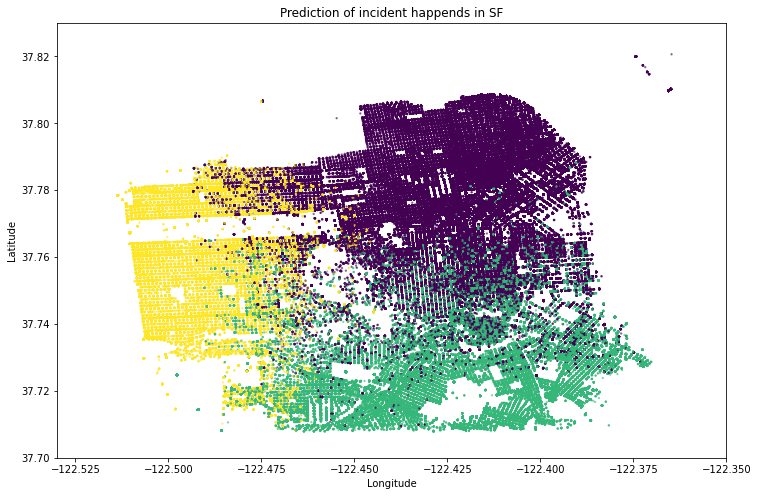

In [0]:
# plot prediction
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,1, figsize =(12,8))
ax.scatter(df_pred.X, df_pred.Y, c=df_pred.Prediction, s=2, alpha=0.46)
ax.set_title('Prediction of incident happends in SF')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_ylim(37.7, 37.83)
ax.set_xlim(-122.53, -122.35)
plt.show()

In [0]:
pip install pystan==2.19.1.1

Python interpreter will be restarted.
Python interpreter will be restarted.


In [0]:
pip install prophet

Python interpreter will be restarted.
Python interpreter will be restarted.


In [0]:
# build a time-series forecast model to forecast number of crime per day in one year(2018) using Facebook Prophet
from prophet import Prophet
# get case count by day (historical dataframe)
df_TvsNumC = df.groupby("Date").count()
display(df_TvsNumC.limit(10))

Date,count
12/08/2016,358
10/18/2017,422
08/16/2014,477
05/08/2015,455
02/16/2017,407
11/24/2016,308
05/06/2017,412
02/20/2014,368
06/21/2014,405
05/22/2015,520


In [0]:
# convert spark dateframe to pandas dataframe
df_TvsNumC = df_TvsNumC.toPandas()

In [0]:
# cast Date to YYYY-MM-DD
df_TvsNumC['Date'] = pd.to_datetime(df_TvsNumC['Date'])
display(df_TvsNumC.head(10))

Date,count
2016-12-08T00:00:00.000+0000,358
2017-10-18T00:00:00.000+0000,422
2014-08-16T00:00:00.000+0000,477
2015-05-08T00:00:00.000+0000,455
2017-02-16T00:00:00.000+0000,407
2016-11-24T00:00:00.000+0000,308
2017-05-06T00:00:00.000+0000,412
2014-02-20T00:00:00.000+0000,368
2014-06-21T00:00:00.000+0000,405
2015-05-22T00:00:00.000+0000,520


In [0]:
# rename columns to ds and y
df_TvsNumC = df_TvsNumC.rename(columns={"Date": "ds", "count": "y"})
display(df_TvsNumC.head(10))

ds,y
2016-12-08T00:00:00.000+0000,358
2017-10-18T00:00:00.000+0000,422
2014-08-16T00:00:00.000+0000,477
2015-05-08T00:00:00.000+0000,455
2017-02-16T00:00:00.000+0000,407
2016-11-24T00:00:00.000+0000,308
2017-05-06T00:00:00.000+0000,412
2014-02-20T00:00:00.000+0000,368
2014-06-21T00:00:00.000+0000,405
2015-05-22T00:00:00.000+0000,520


In [0]:
# call its fit method and pass in the historical dataframe
m = Prophet()
m.fit(df_TvsNumC)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
Out[7]: <prophet.forecaster.Prophet at 0x7f143e67e640>

In [0]:
future = m.make_future_dataframe(periods=230)
future.tail()

,ds
5838,2018-12-27
5839,2018-12-28
5840,2018-12-29
5841,2018-12-30
5842,2018-12-31


In [0]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
5838,2018-12-27,345.560846,297.050610,395.069333
5839,2018-12-28,372.001276,320.486086,422.217148
5840,2018-12-29,354.288643,299.451935,405.088664
5841,2018-12-30,324.613225,270.352156,374.187307
5842,2018-12-31,339.239470,287.886887,392.777391


In [0]:
#  plot the forecast(number of crimes per day)

from prophet.plot import plot_plotly, plot_components_plotly
plot_plotly(m, forecast)

In [0]:
#  plot forecast components
plot_components_plotly(m, forecast)
